
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana, align = center">
    <p style = "padding: 15px; color: White;"><b>House Rent Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.shape

(4746, 12)

In [26]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [27]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [38]:
df['Year'] = df['Posted On'].apply(lambda x:x.split('-')[0]).astype(int)
df['Month'] = df['Posted On'].apply(lambda x:x.split('-')[1]).astype(int)
df['Date'] = df['Posted On'].apply(lambda x:x.split('-')[2]).astype(int)

In [43]:
df.drop(['Posted On'],axis=1,inplace =True)
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Date
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022,5,18
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022,5,15
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,2022,7,10
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,2022,7,6


In [31]:
for column in df.columns:
    if df[column].dtype =='object':
        print(column,':',len(df[column].unique()))

Floor : 480
Area Type : 3
Area Locality : 2235
City : 6
Furnishing Status : 3
Tenant Preferred : 3
Point of Contact : 3



<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana, align = center">
    <p style = "padding: 15px; color: White;"><b>Count,Distribution and Avg Rent of Houses on Rent in different Cities

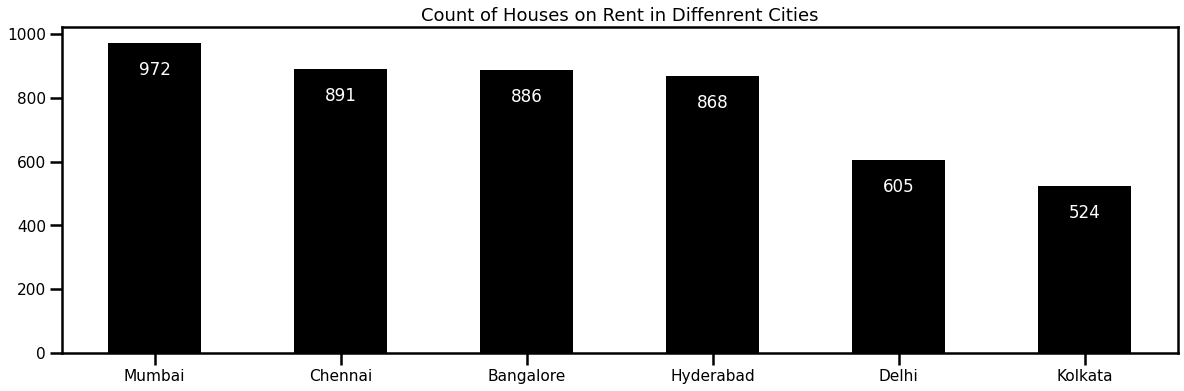

In [125]:
sns.set_context("poster",font_scale=0.7)
plt.figure(figsize=(20,6))
ax = df.City.value_counts().plot(kind ='bar',color='black',rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-100),ha='center',color='white')
    
plt.title('Count of Houses on Rent in Diffenrent Cities',fontsize=18)
plt.show()

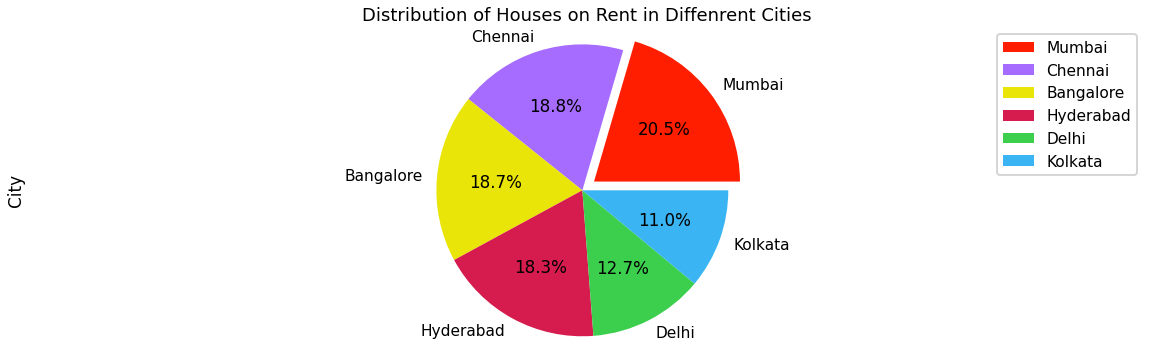

In [138]:
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']
explode = [0.1,0,0,0,0,0]
plt.figure(figsize = (20, 6))
ax = df.City.value_counts().plot(kind='pie',colors =colors,explode=explode,rot=0,autopct='%1.1f%%')
plt.axis('equal')
ax.legend(df.City.value_counts().index,loc='best')

plt.title('Distribution of Houses on Rent in Diffenrent Cities',fontsize=18)
plt.show()

In [227]:
C= df.groupby('City')['Rent'].mean().index.tolist()
avg_rent_city = df.groupby('City')['Rent'].mean().values.tolist()
px.bar(x=C,y=avg_rent_city,color=avg_rent_city)


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana, align = center">
    <p style = "padding: 15px; color: White;"><b>Count of Houses on Rent based on furnishing status

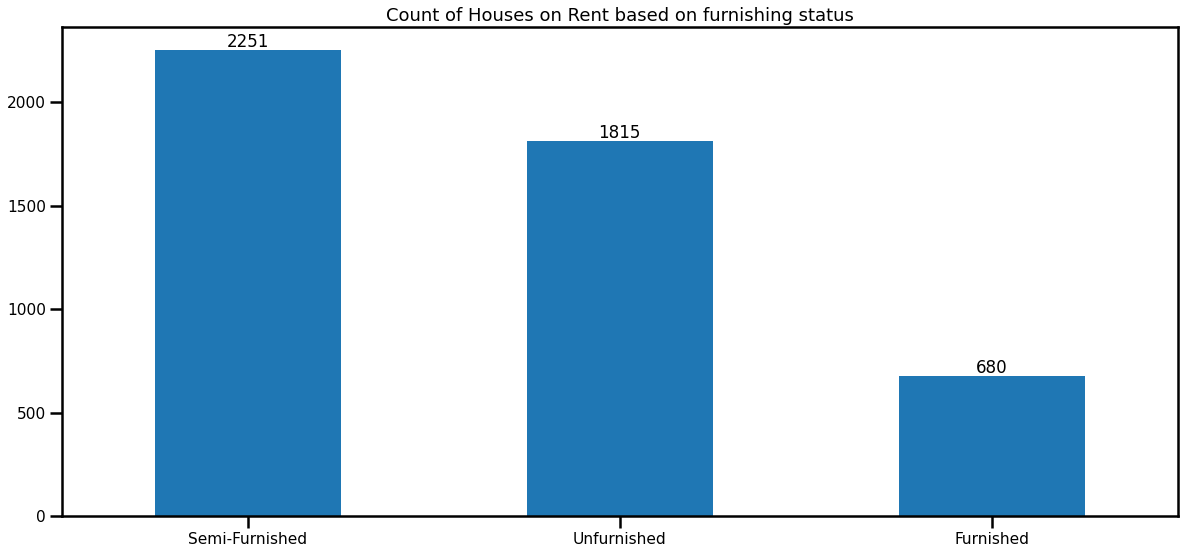

In [129]:
sns.set_context("poster",font_scale=0.7)
plt.figure(figsize=(20,9))
ax = df['Furnishing Status'].value_counts().plot(kind='bar',rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+15),ha='center',color ='black')
    
plt.title('Count of Houses on Rent based on furnishing status',fontsize=18)
plt.show()

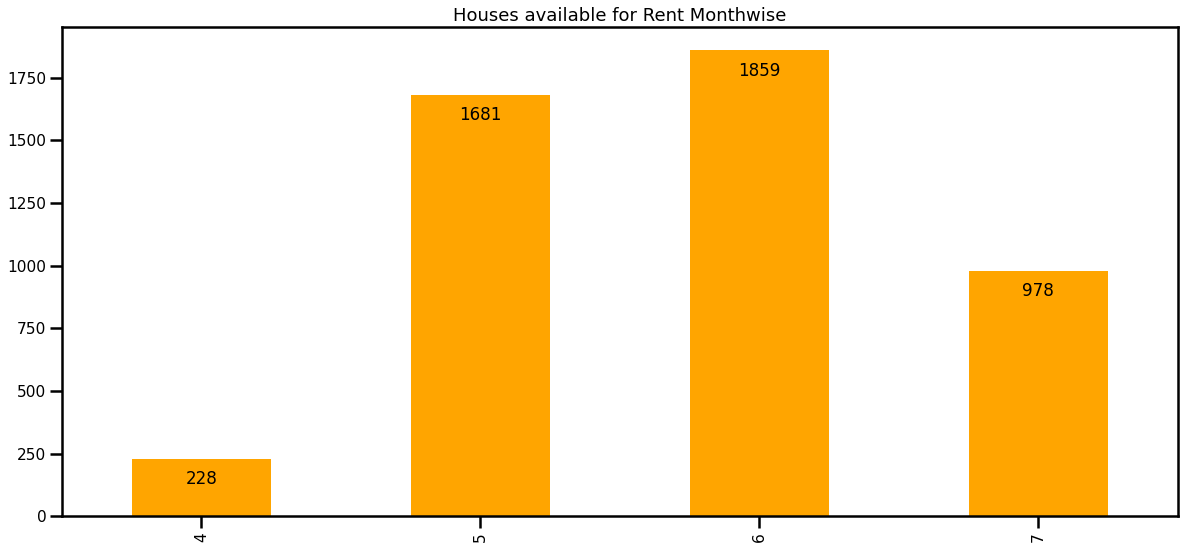

In [158]:
sns.set_context("poster",font_scale=0.7)
plt.figure(figsize=(20,9))
ax = df.Month.value_counts().sort_index().plot(kind = 'bar',color='orange')

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-100),ha='center',color='black')
    
plt.title('Houses available for Rent Monthwise',fontsize=18)
plt.show()


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana, align = center">
    <p style = "padding: 15px; color: White;"><b>Relation Between Size and Rent 

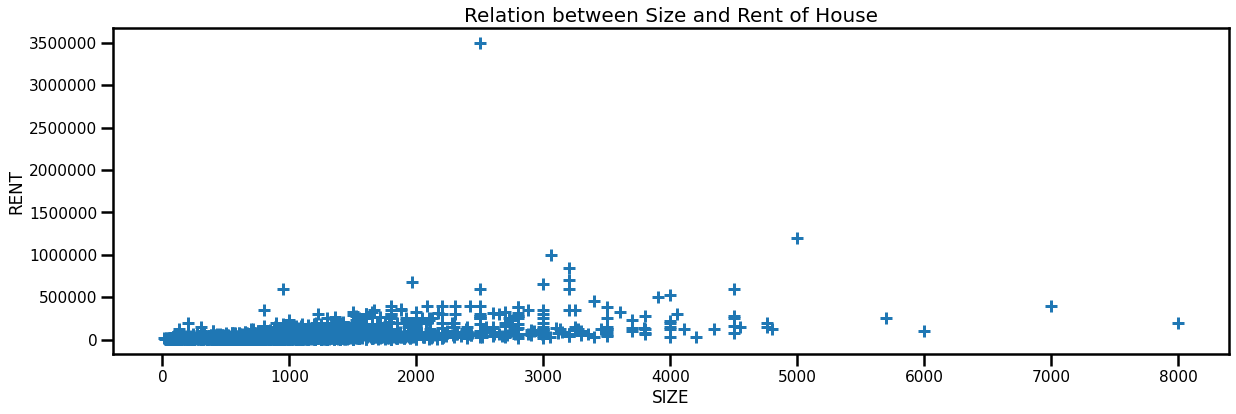

In [171]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(x=df.Size,y=df.Rent,marker='+')
plt.title('Relation between Size and Rent of House',fontsize=20)
plt.xlabel('SIZE')
plt.ylabel('RENT')
plt.show()


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana, align = center">
    <p style = "padding: 15px; color: White;"><b>Most Common word in Area Locality

In [173]:
from wordcloud import WordCloud, STOPWORDS

In [174]:
text = " ".join(Company for Company in df["Area Locality"])

In [180]:
word_cloud = WordCloud(width = 1600,
                       height = 800,
                       colormap = 'prism',
                       background_color = "white").generate(text)

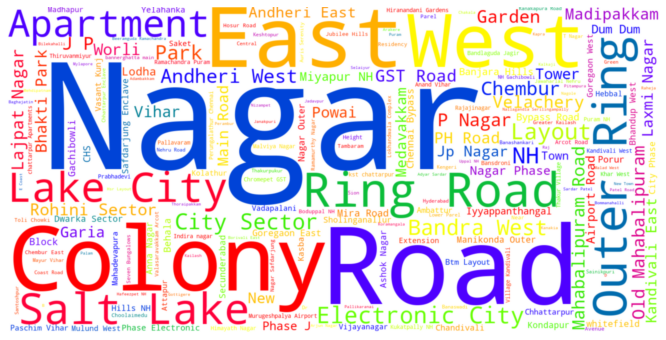

In [181]:
plt.figure(figsize = (30, 6))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana, align = center">
    <p style = "padding: 15px; color: White;"><b>Distribution of Available Houses for Tenant Preferred

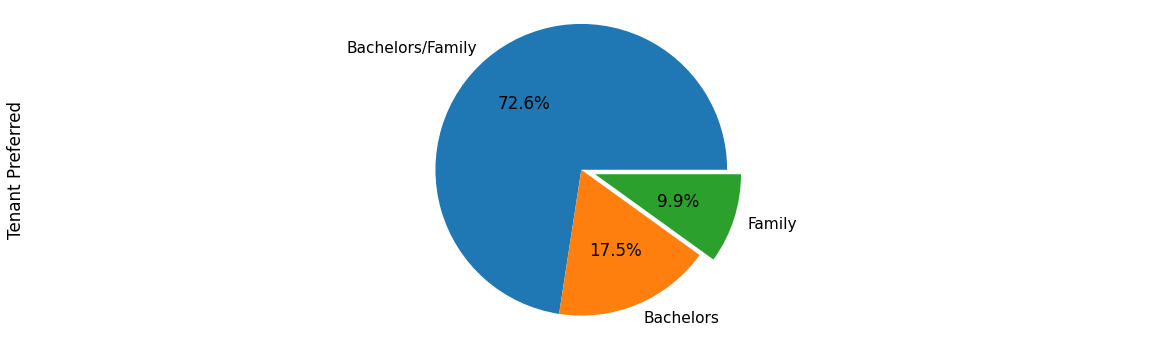

In [190]:
plt.figure(figsize=(20,6))
explode = [0,0,0.1]
df['Tenant Preferred'].value_counts().plot(kind='pie',explode=explode,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [303]:
C= df.groupby('Tenant Preferred')['Rent'].mean().index.tolist()
avg_rent_city = df.groupby('Tenant Preferred')['Rent'].mean().values.tolist()
px.bar(x=C,y=avg_rent_city,color=avg_rent_city)


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana, align = center">
    <p style = "padding: 15px; color: White;"><b>Distribution of Size for available Houses

<AxesSubplot:xlabel='Size', ylabel='Count'>

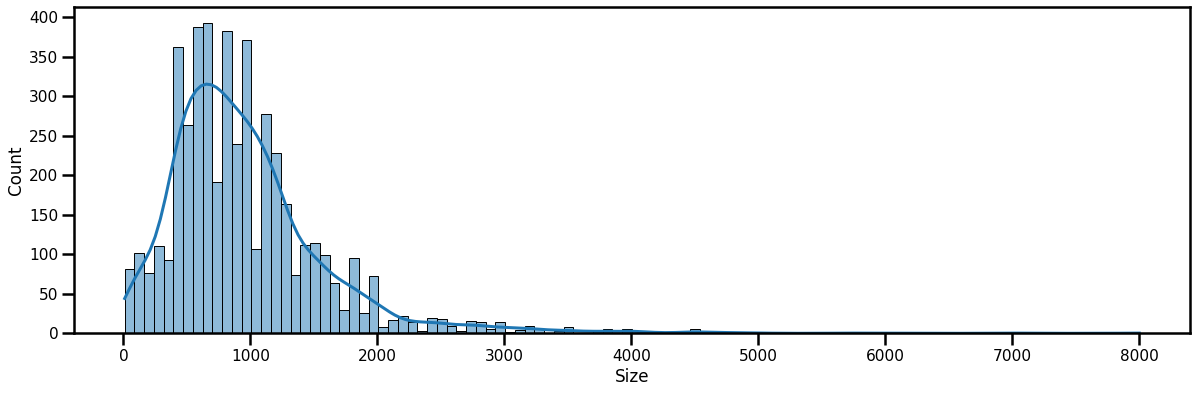

In [196]:
plt.figure(figsize=(20,6))
sns.histplot(df.Size,kde=True)
#plt.ticklabel_format(style = 'plain')

<AxesSubplot:>

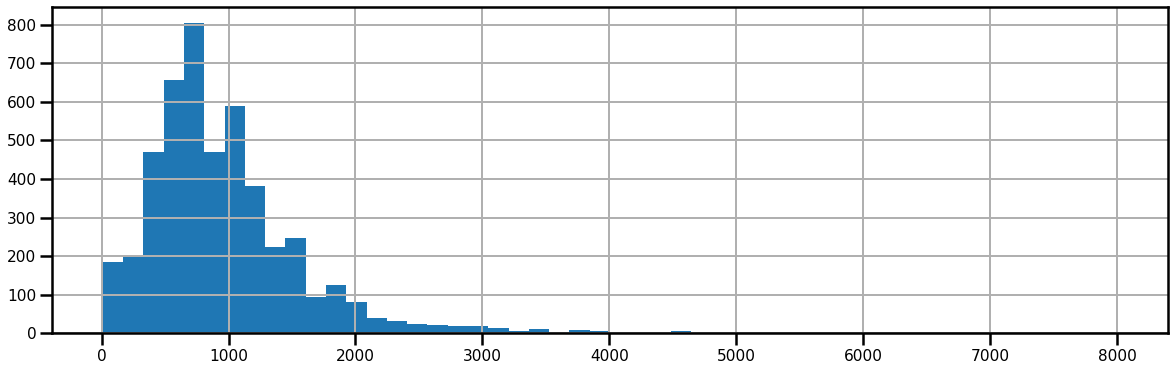

In [204]:
plt.figure(figsize=(20,6))
n_bins=50
df["Size"].hist(bins = n_bins)

<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana, align = center">
    <p style = "padding: 15px; color: White;"><b>Rent Distribution for available Houses

<AxesSubplot:>

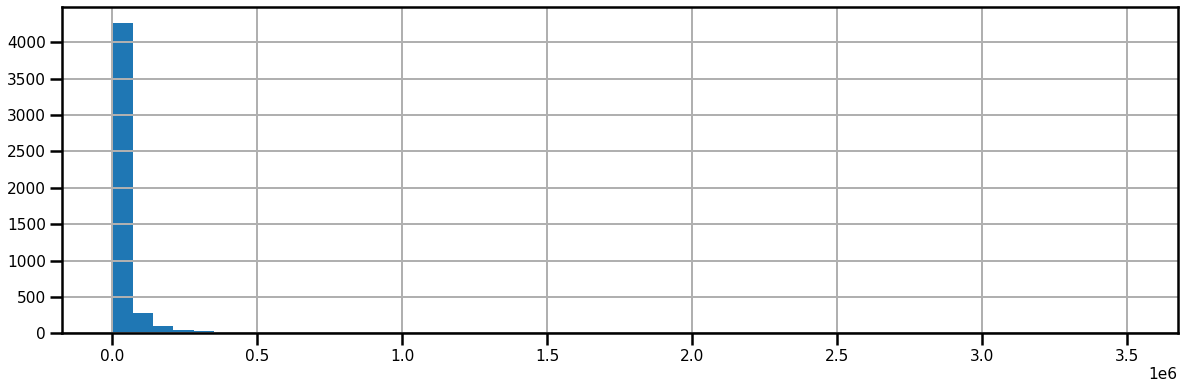

In [211]:
plt.figure(figsize=(20,6))
n_bins=50
df["Rent"].hist(bins = n_bins)


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana, align = center">
    <p style = "padding: 15px; color: White;"><b>Pomt of Contact for Rentable Houses

In [215]:
import plotly.express as px

In [300]:
contact_count = df['Point of Contact'].value_counts()
px.pie(labels=contact_count.index.tolist(), values=city_count.tolist(), names=city_count.index.tolist(), hole=0.4, title='Contact Point',)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
 11  Year               4746 non-null   int32 
 12  Month              4746 non-null   int32 
 13  Date               4746 non-null   int32 
dtypes: int32(3), int64(4), object(7)
memory usage: 463.6+ KB


In [229]:
for column in df.columns:
    if df[column].dtype =='object':
        print(column,':',len(df[column].unique()))

Floor : 480
Area Type : 3
Area Locality : 2235
City : 6
Furnishing Status : 3
Tenant Preferred : 3
Point of Contact : 3


**Column Area Locality is having lot of unique values and it won't help that much in predicting values**

In [230]:
df.drop(['Area Locality'],axis=1,inplace=True)
df.head(2)

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Date
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13


In [231]:
df.Floor.unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [244]:
df.Floor = df.Floor.replace({0:'0'})

In [252]:
df.Floor.apply(lambda x:x.split('out of')[0])

0       Ground 
1            1 
2            1 
3            1 
4            1 
         ...   
4741         3 
4742         1 
4743         3 
4744        23 
4745         4 
Name: Floor, Length: 4746, dtype: object

In [256]:
df['F']= df.Floor.apply(lambda x:x.replace('out of',''))

In [266]:
df['Floor_no']=df.F.apply(lambda x:x.split(' ')[0])

In [268]:
df['Total Floors'] = df.F.apply(lambda x:x.split(' ')[-1]).astype(int)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   Point of Contact   4746 non-null   object
 10  Year               4746 non-null   int32 
 11  Month              4746 non-null   int32 
 12  Date               4746 non-null   int32 
 13  F                  4746 non-null   object
 14  Total Floors       4746 non-null   int32 
 15  Floor_no           4746 non-null   object
dtypes: int32(4), int64(4), object(8)
memory us

In [270]:
df.Floor_no.unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper', '11',
       'Lower', '6', '14', '43', '13', '18', '17', '9', '19', '60', '34',
       '12', '26', '25', '53', '16', '10', '39', '32', '47', '28', '20',
       '15', '65', '40', '37', '22', '21', '30', '35', '33', '44', '41',
       '46', '27', '45', '48', '50', '24', '23', '29', '49', '36', '76',
       '0'], dtype=object)

In [274]:
df.Floor_no = df.Floor_no.replace({'Ground':'0','Upper':'0','Lower':'0'}).astype(int)

In [276]:
df.drop(['F','Floor'],axis=1,inplace = True)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   City               4746 non-null   object
 5   Furnishing Status  4746 non-null   object
 6   Tenant Preferred   4746 non-null   object
 7   Bathroom           4746 non-null   int64 
 8   Point of Contact   4746 non-null   object
 9   Year               4746 non-null   int32 
 10  Month              4746 non-null   int32 
 11  Date               4746 non-null   int32 
 12  Total Floors       4746 non-null   int32 
 13  Floor_no           4746 non-null   int32 
dtypes: int32(5), int64(4), object(5)
memory usage: 426.5+ KB


In [279]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [280]:
df['Area Type']= df['Area Type'].replace({'Carpet Area':0,'Built Area':1,'Super Area':2})

In [282]:
df.City.unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [293]:
df.City = df.City.replace({'Mumbai':5,'Delhi':4,'Bangalore':3,'Chennai':2,'Hyderabad':1,'Kolkata':0}).astype(int)

In [296]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [297]:
df['Furnishing Status'] =df['Furnishing Status'].replace({'Unfurnished':0,'Semi-Furnished':1,'Furnished':2})

In [299]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [304]:
df['Tenant Preferred'] = df['Tenant Preferred'].replace({'Bachelors/Family':1,'Bachelors':2,'Family':3})

In [305]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Date,Total Floors,Floor_no
0,2,10000,1100,2,0,0,1,2,Contact Owner,2022,5,18,2,0
1,2,20000,800,2,0,1,1,1,Contact Owner,2022,5,13,3,1
2,2,17000,1000,2,0,1,1,1,Contact Owner,2022,5,16,3,1
3,2,10000,800,2,0,0,1,1,Contact Owner,2022,7,4,2,1
4,2,7500,850,0,0,0,2,1,Contact Owner,2022,5,9,2,1


In [306]:
df['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [307]:
df['Point of Contact'] = df['Point of Contact'].replace({'Contact Agent':0,'Contact Owner':1,'Contact Builder':1})

In [308]:
df.sample(5)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Date,Total Floors,Floor_no
942,2,36000,620,0,5,1,3,2,0,2022,7,7,14,3
3880,2,10000,1100,2,1,0,1,2,1,2022,5,20,3,1
2166,1,9000,600,0,3,1,3,1,1,2022,6,8,4,3
4178,2,14000,800,2,1,1,1,2,1,2022,5,12,3,0
1710,1,12000,600,2,3,1,2,1,0,2022,6,16,3,3


In [311]:
df.drop(['Year'],axis=1,inplace=True)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   BHK                4746 non-null   int64
 1   Rent               4746 non-null   int64
 2   Size               4746 non-null   int64
 3   Area Type          4746 non-null   int64
 4   City               4746 non-null   int32
 5   Furnishing Status  4746 non-null   int64
 6   Tenant Preferred   4746 non-null   int64
 7   Bathroom           4746 non-null   int64
 8   Point of Contact   4746 non-null   int64
 9   Month              4746 non-null   int32
 10  Date               4746 non-null   int32
 11  Total Floors       4746 non-null   int32
 12  Floor_no           4746 non-null   int32
dtypes: int32(5), int64(8)
memory usage: 389.4 KB


In [313]:
df.corr()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Date,Total Floors,Floor_no
BHK,1.000000,0.369718,0.716145,-0.154410,0.004646,0.140264,0.123609,0.794885,-0.231239,0.122652,-0.052725,0.247936,0.223919
Rent,0.369718,1.000000,0.413551,-0.215679,0.274174,0.146251,0.082496,0.441215,-0.339750,0.101925,-0.023783,0.352268,0.327086
Size,0.716145,0.413551,1.000000,-0.080293,-0.077066,0.172783,0.109498,0.740703,-0.214521,0.138213,-0.046957,0.189597,0.170299
Area Type,-0.154410,-0.215679,-0.080293,1.000000,-0.295018,-0.055943,-0.309966,-0.184033,0.561606,-0.206423,0.026946,-0.286295,-0.256136
City,0.004646,0.274174,-0.077066,-0.295018,1.000000,0.153904,0.091666,0.150818,-0.473133,0.054924,0.030596,0.431780,0.387076
Furnishing Status,0.140264,0.146251,0.172783,-0.055943,0.153904,1.000000,-0.012982,0.181425,-0.131522,0.054302,-0.018431,0.103812,0.102858
Tenant Preferred,0.123609,0.082496,0.109498,-0.309966,0.091666,-0.012982,1.000000,0.144298,-0.242900,0.130119,-0.045567,0.141589,0.129632
Bathroom,0.794885,0.441215,0.740703,-0.184033,0.150818,0.181425,0.144298,1.000000,-0.327901,0.163559,-0.066574,0.361921,0.331055
Point of Contact,-0.231239,-0.339750,-0.214521,0.561606,-0.473133,-0.131522,-0.242900,-0.327901,1.000000,-0.276486,0.042204,-0.465358,-0.405395
Month,0.122652,0.101925,0.138213,-0.206423,0.054924,0.054302,0.130119,0.163559,-0.276486,1.000000,-0.524634,0.173439,0.148623


<AxesSubplot:>

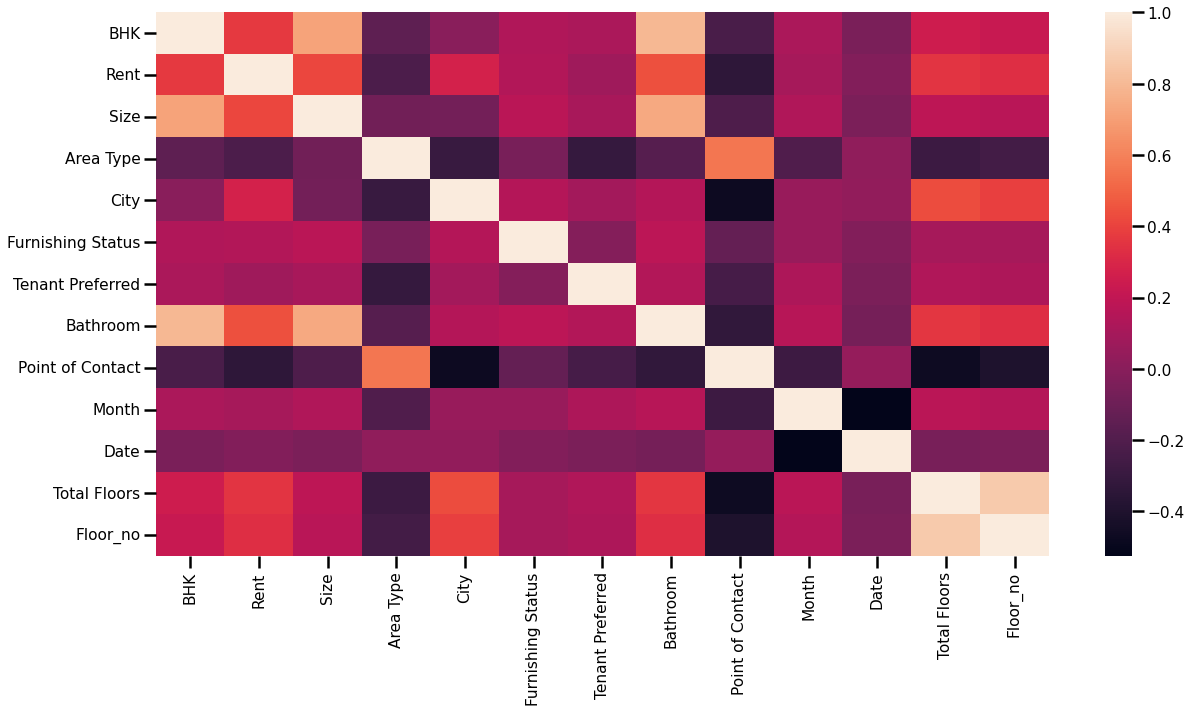

In [379]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())